In [27]:
# 高维线性回归
%matplotlib inline
import d2lzh as d2l
from mxnet import autograd, gluon, nd, init
from mxnet.gluon import data as gdata, loss as gloss, nn

n_train, n_test, num_inputs = 20,100,200
true_w, true_b = nd.ones((num_inputs, 1))*0.01, 0.05

features = nd.random.normal(shape=(n_train+n_test, num_inputs))
labels = nd.dot(features,true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)
train_features, test_features = features[:n_train], features[n_train:]
train_labels, test_labels = labels[:n_train], labels[n_train:]

In [20]:
# 初始化模型参数
def init_params():
    w = nd.random.normal(scale=0.01, shape=(num_inputs,1))
    b = nd.zeros(shape=(1,))
    w.attach_grad()
    b.attach_grad()
    return [w,b]

In [28]:
train_features,train_labels

(
 [[ 0.8431167  -0.7476888   0.7411089  ... -0.7388897   0.5966456
   -0.46915895]
  [-0.4339733   0.6704182   1.3387939  ... -0.56653345 -0.7549326
    0.4500242 ]
  [-0.53193796  1.1954637   2.5209265  ...  0.60921013 -1.3575661
    1.01458   ]
  ...
  [-0.8327861   0.6873399  -0.8492818  ...  0.43920222 -1.3760973
    1.2114215 ]
  [-0.24433094  0.17318508 -0.4639589  ...  0.57033414 -0.58042103
    0.303161  ]
  [-1.0486788   1.3736373  -0.57060236 ... -0.03977551  0.42888406
    1.2548896 ]]
 <NDArray 20x200 @cpu(0)>,
 
 [[-0.21143143]
  [ 0.12985514]
  [ 0.13824612]
  [-0.1371814 ]
  [-0.23888053]
  [ 0.03847153]
  [ 0.00579481]
  [-0.01931381]
  [-0.03472668]
  [-0.03588225]
  [-0.04377824]
  [ 0.23437044]
  [ 0.0253259 ]
  [ 0.36290085]
  [ 0.31707707]
  [-0.03101578]
  [ 0.01519791]
  [-0.03159913]
  [-0.23500551]
  [ 0.03785119]]
 <NDArray 20x1 @cpu(0)>)

In [11]:
def l2_penalty(w):
    return (w**2).sum()/2 # L2 惩罚项

In [30]:
batch_size, num_epochs, lr = 1, 100, 0.003
net, loss = d2l.linreg, d2l.squared_loss
train_iter = gdata.DataLoader(gdata.ArrayDataset(
    train_features, train_labels), batch_size, shuffle=True)

def fit_and_plot(lambd):
    w, b = init_params()
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                # 添加了L2范数惩罚项，广播机制使其变成长度为batch_size的向量
                l = loss(net(X, w, b), y) + lambd * l2_penalty(w)
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
        train_ls.append(loss(net(train_features, w, b),
                             train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features, w, b),
                            test_labels).mean().asscalar())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', w.norm().asscalar())

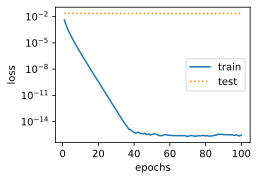

L2 norm of w: 0.14243647


In [31]:
fit_and_plot(lambd=0)

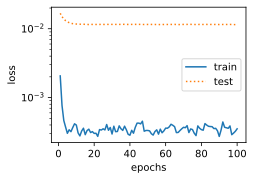

L2 norm of w: 0.039109398


In [36]:
fit_and_plot(lambd=3)